In [2]:
import pandas as pd
import numpy as np 
from gpxutils import parse_gpx 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Analysis of Cycling Data

We are provided with four files containing recordings of cycling activities that include GPS location data as
well as some measurements related to cycling performace like heart rate and power.  The goal is to perform
some exploration and analysis of this data. 

The data represents four races.  Two are time trials where the rider rides alone on a set course.  Two are 
road races where the rider rides with a peleton.  All were held on the same course but the road races include
two laps where the time trials include just one. 

Questions to explore with the data:
* What is the overall distance travelled for each of the rides? What are the average speeds etc.  Provide a summary for each ride.
* Compare the range of speeds for each ride, are time trials faster than road races? 
* Compare the speeds achieved in the two time trials (three years apart).  As well as looking at the averages, can you see where in the ride one or the other is faster.  
* From the elevation_gain field you can see whether the rider is _climbing_ , _descending_ or on the _flat_.   Use this to calculate the average speeds in those three cases (climbing, flat or descending).  Note that _flat_ might not be zero elevation_gain but might allow for slight climbs and falls.  

For time varying data like this it is often useful to _smooth_ the data using eg. a [rolling mean](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.rolling_mean.html).  You might want to experiment with smoothing in some of your analysis (not required but may be of interest).

## Description of Fields

* _index_ is a datetime showing the time that the observation was made (I wasn't riding at night, this is converted to UTC)
* __latitude, longitude, elevation__ from the GPS, the position of the rider at each timepoint, elevation in m
* __temperature__ the current ambient temperature in degrees celcius
* __power__ the power being generated by the rider in Watts
* __cadence__ the rotational speed of the pedals in revolutions per minute
* __hr__ heart rate in beats per minute
* __elevation_gain__ the change in elevation in m between two observations
* __distance__ distance travelled between observations in km
* __speed__ speed measured in km/h

You are provided with code in [gpxutils.py](gpxutils.py) to read the GPX XML format files that are exported by cycling computers and applications.  The sample files were exported from [Strava](https://strava.com/) and represent four races by Steve Cassidy.


In [3]:
rr_2016 = parse_gpx('files/Calga_RR_2016.gpx')
tt_2016 = parse_gpx('files/Calga_TT_2016.gpx')
rr_2019 = parse_gpx('files/Calga_RR_2019.gpx')
tt_2019 = parse_gpx('files/Calga_TT_2019.gpx')

list_ride=[rr_2016,tt_2016,rr_2019,tt_2019]

In [4]:
rr_2016=rr_2016.rolling(window=10).mean()
rr_2016=rr_2016.dropna()

rr_2016.head()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2016-05-14 04:03:04+00:00,-33.414977,151.221880,208.60,29.0,0.0,64.3,111.7,0.014839,0.00,23.261825,2.3
2016-05-14 04:03:07+00:00,-33.414848,151.221788,208.60,29.0,0.0,68.9,114.0,0.016686,0.00,24.692915,2.5
2016-05-14 04:03:10+00:00,-33.414713,151.221696,208.60,29.0,0.0,73.7,116.5,0.017294,0.00,25.968708,2.4
2016-05-14 04:03:12+00:00,-33.414578,151.221606,208.64,29.0,0.0,77.1,118.8,0.017156,0.04,26.781640,2.3
2016-05-14 04:03:13+00:00,-33.414447,151.221517,208.72,29.0,0.0,80.0,120.9,0.016801,0.08,27.845332,2.2


In [5]:
rr_2016.describe()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
count,2812.000000,2812.000000,2812.000000,2812.000000,2812.0,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000
mean,-33.367847,151.225538,232.505569,25.275427,0.0,66.120164,158.480548,0.017398,-0.003627,34.975420,1.842817
std,0.028231,0.006016,29.703409,1.337601,0.0,28.222782,10.691977,0.007872,0.409764,10.181417,0.817112
min,-33.416245,151.211557,177.620000,24.000000,0.0,0.000000,111.700000,0.004683,-1.440000,15.353816,1.000000
25%,-33.393553,151.221877,209.740000,24.000000,0.0,61.675000,151.900000,0.012051,-0.320000,26.959897,1.200000
50%,-33.371244,151.227287,226.100000,25.000000,0.0,77.150000,157.400000,0.016112,0.080000,33.789892,1.600000
75%,-33.342240,151.230070,258.280000,26.000000,0.0,83.300000,165.800000,0.022454,0.380000,42.438297,2.300000
max,-33.317016,151.235108,295.300000,30.000000,0.0,108.000000,201.600000,0.049202,0.640000,65.902724,5.500000


In [6]:
def Q1 (ride):
    
    dst=ride.distance.sum()
    print('the overall diatance is {:.2f} km'.format(dst))
    
    time=(ride.timedelta.sum())/3600
    print('the total time is {:.2f} hours'.format(time))
    
    avg_speed=dst/time
    print('the average speed is {:.2f} km/h'.format(avg_speed))    


In [7]:
def Q2 (ride):

    max_speed=ride.speed.max()
    min_speed=ride.speed.min()
    print('the range of speed is {:.2f} km/h'.format(max_speed-min_speed))
    

<AxesSubplot:>

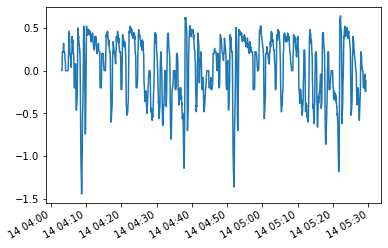

In [10]:
rr_2016.elevation_gain.plot()

In [11]:
def Q3 (ride):
    # The normal elevation_gain range is choosen between (-1,1);
    #  Flat might not be zero elevation_gain but might allow for slight climbs and falls. we choose the range(-0.1,0.1) as flat.
    ride=ride[(ride.elevation_gain < 1) & (ride.elevation_gain > -1) ]
    
    climbing=ride[ (ride.elevation_gain > 0.1) ]
    descending=ride[ (ride.elevation_gain < -0.1) ]
    flat=ride[ (ride.elevation_gain > -0.1 ) & (ride.elevation_gain < 0.1) ]
    
    print('average speed of \nclimbing is {:.2f} km/h,\ndescending is {:.2f} km/h,\nflat is {:.2f} km/h \n\n'.format(climbing.speed.mean(),descending.speed.mean(),flat.speed.mean()))


<AxesSubplot:title={'center':'tt_2019 speed plot'}, xlabel=' time'>

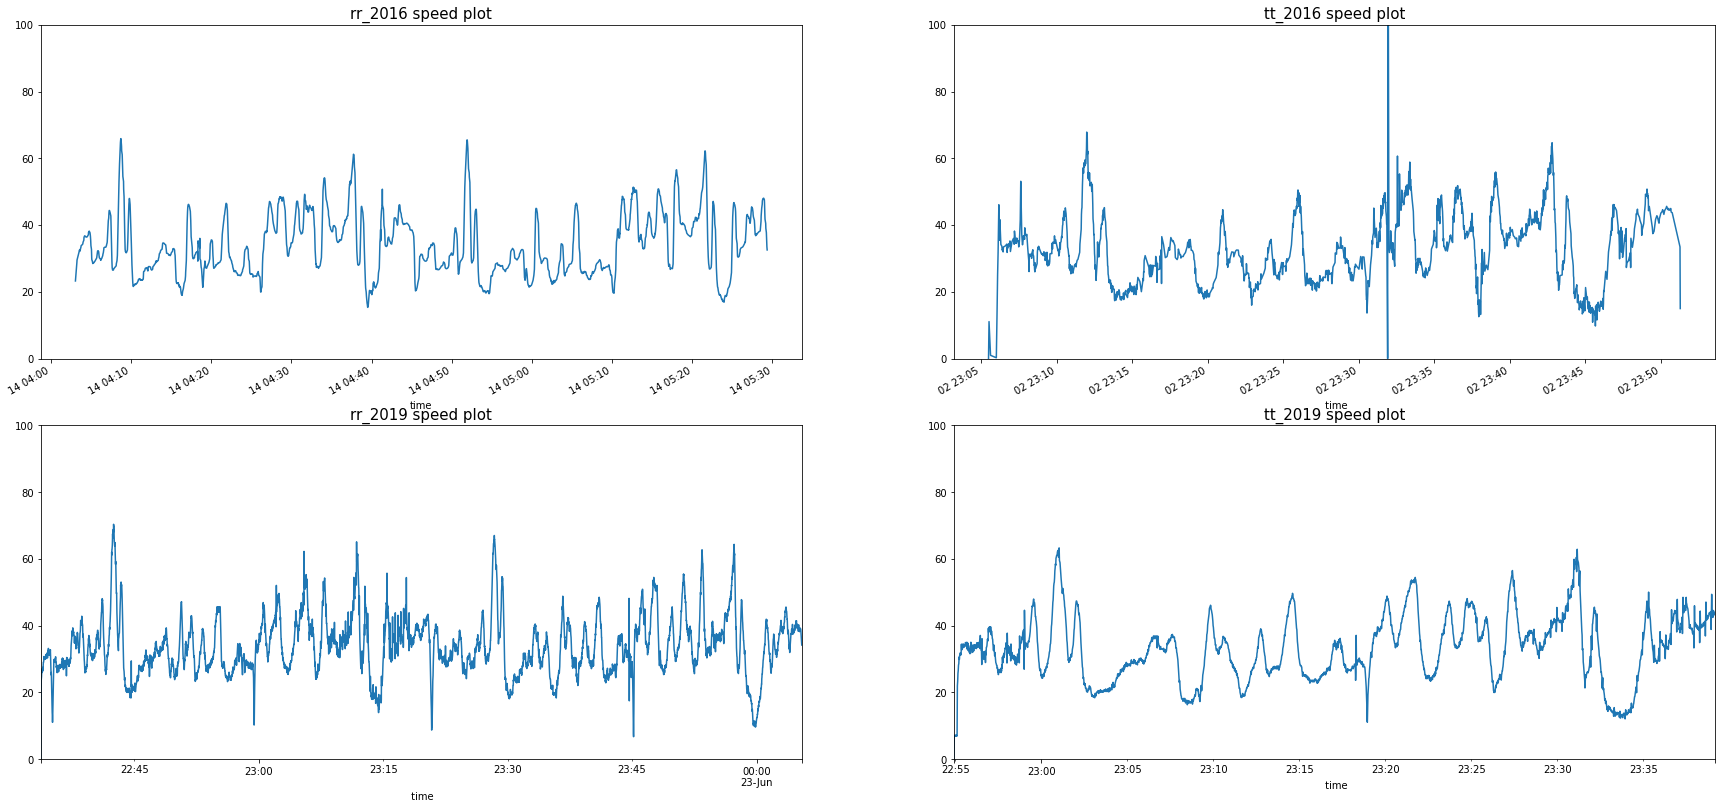

In [15]:
plt.figure(figsize=(30,15))
plt.subplot(2,2,1)
plt.xlabel('time')
plt.ylim(0,100)
plt.title('rr_2016 speed plot',size=15)
rr_2016.speed.plot()

plt.subplot(2,2,2)
plt.xlabel(' time')
plt.ylim(0,100)
plt.title('tt_2016 speed plot',size=15)
tt_2016.speed.plot()

plt.subplot(2,2,3)
plt.xlabel(' time')
plt.ylim(0,100)
plt.title('rr_2019 speed plot',size=15)
rr_2019.speed.plot()

plt.subplot(2,2,4)
plt.xlabel(' time')
plt.ylim(0,100)
plt.title('tt_2019 speed plot',size=15)
tt_2019.speed.plot()
    

In [16]:
def loop_all ():
    for ride in list_ride:
        ride.rolling(window=10).mean()
        ride=ride.dropna()
        # From the plot, choose a reasonable range for speed.
        ride=ride[(ride.speed < 80) & (ride.speed >= 0)] 
        Q1(ride)
        Q2(ride)
        Q3(ride)
        
print('from top to bottom are data of rr_2016,tt_2016,rr_2019,tt_2019\n\n')
loop_all()

from top to bottom are data of rr_2016,tt_2016,rr_2019,tt_2019


the overall diatance is 49.00 km
the total time is 1.44 hours
the average speed is 33.93 km/h
the range of speed is 70.71 km/h
average speed of 
climbing is 26.33 km/h,
descending is 44.32 km/h,
flat is 34.43 km/h 


the overall diatance is 24.76 km
the total time is 0.76 hours
the average speed is 32.46 km/h
the range of speed is 67.86 km/h
average speed of 
climbing is 24.51 km/h,
descending is 43.21 km/h,
flat is 34.04 km/h 


the overall diatance is 51.79 km
the total time is 1.53 hours
the average speed is 33.89 km/h
the range of speed is 63.63 km/h
average speed of 
climbing is 28.81 km/h,
descending is 40.01 km/h,
flat is 33.48 km/h 


the overall diatance is 24.38 km
the total time is 0.74 hours
the average speed is 33.07 km/h
the range of speed is 56.43 km/h
average speed of 
climbing is 26.03 km/h,
descending is 41.87 km/h,
flat is 33.34 km/h 




<AxesSubplot:title={'center':'tt_2019 elevation plot'}, xlabel='time'>

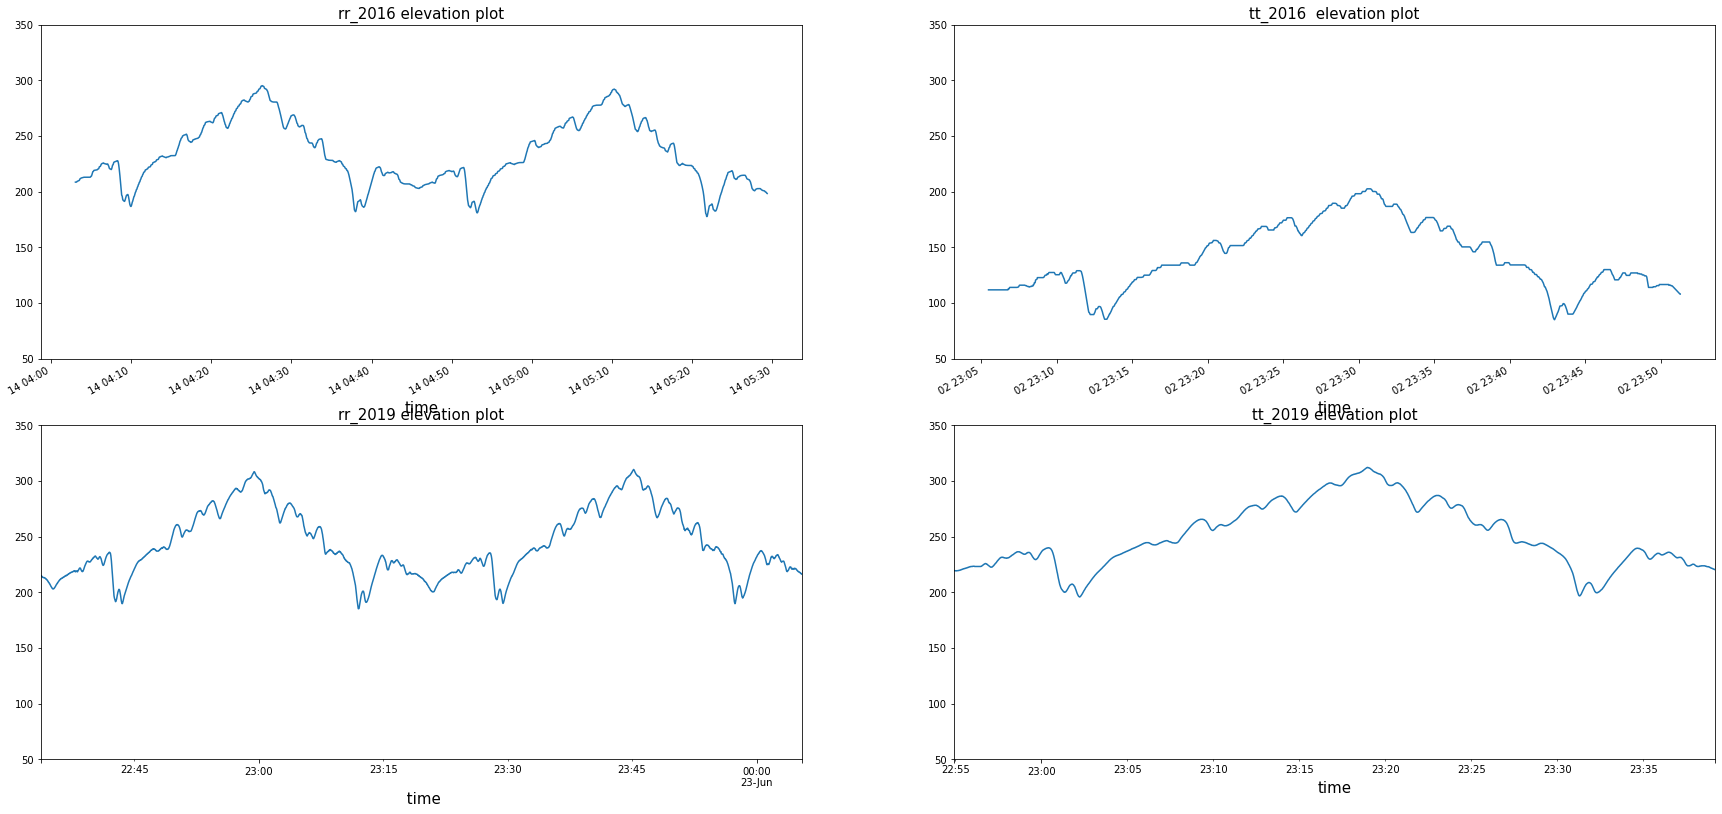

In [17]:
plt.figure(figsize=(30,15))
plt.subplot(2,2,1)
plt.xlabel('time',size=15)
plt.ylim(50,350)
plt.title('rr_2016 elevation plot',size=15)
rr_2016.elevation.plot()

plt.subplot(2,2,2)
plt.xlabel('time',size=15)
plt.ylim(50,350)
plt.title('tt_2016  elevation plot',size=15)
tt_2016.elevation.plot()

plt.subplot(2,2,3)
plt.xlabel(' time',size=15)
plt.ylim(50,350)
plt.title('rr_2019 elevation plot',size=15)
rr_2019.elevation.plot()

plt.subplot(2,2,4)
plt.xlabel('time',size=15)
plt.ylim(50,350)
plt.title('tt_2019 elevation plot',size=15)
tt_2019.elevation.plot()
    

##  Speed Conclusion
- Steve's average riding speed is round 33 km/h
- The speed range of time trial varies more than race
- The average speed of descending > flat > climbing 
- The average speed of race is higher than time trial


## Extra explore

C:\Users\Melinda\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Melinda\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Melinda\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Melinda\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


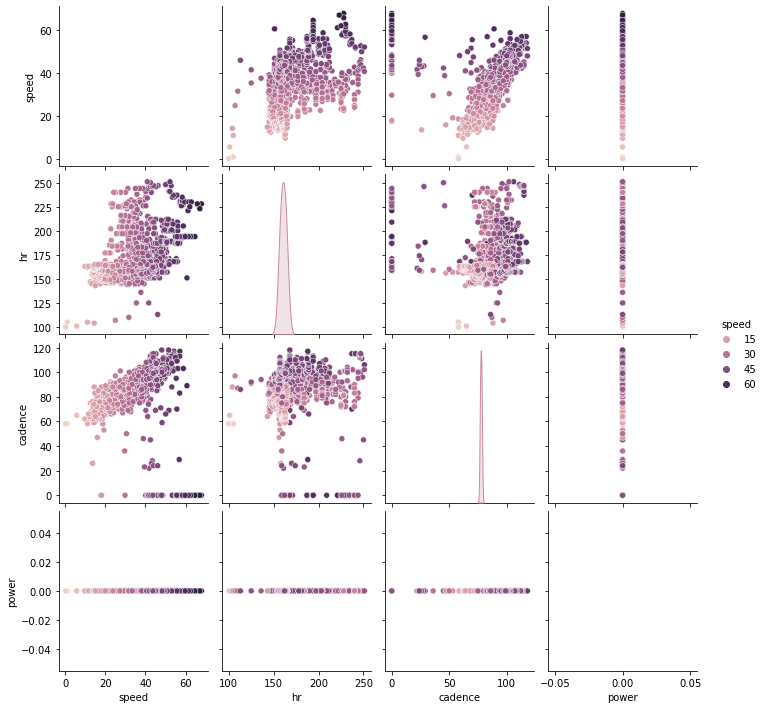

In [105]:
sns.pairplot(tt_2016,hue='speed',
            x_vars=['speed','hr','cadence','power'],
            y_vars=['speed','hr','cadence','power'])

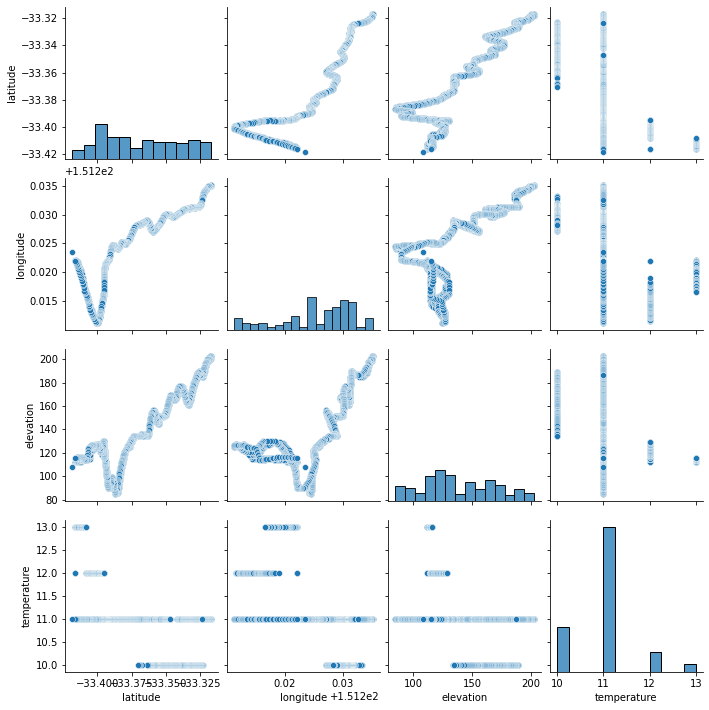

In [109]:
sns.pairplot(tt_2016,
            x_vars=['latitude','longitude','elevation','temperature'],
            y_vars=['latitude','longitude','elevation','temperature'])

## Extra explore conclusion
- speed have positive linear relationship with heart rate, which means the higher the speed the higher heart rate.
- speed also have positive linear relationship with cadence, which is quite the same as our common sense.
- speed doesn't effect power, power always remian as 0 no matter how the speed.

- And we can also view the trace map of the race from the pairplot with latitude,longitude,elevation above.

## Challenge: Gear Usage

A modern race bike has up to 22 different gears with two chainrings on the front (attached to the pedals) and 10 or 11 at the back (attached to the wheel).   The ratio of the number of teeth on the front and rear cogs determines the distance travelled with one revolution of the pedals (often called __development__, measured in metres).  Low development is good for climbing hills while high development is for going fast downhill or in the final sprint. 

We have a measure of the number of rotations of the pedals per minute (__cadence__) and a measure of __speed__.  Using these two variables we should be able to derive a measure of __development__ which would effectivly tell us which gear the rider was using at the time.   Development will normally range between __2m__ and __10m__.  Due to errors in GPS and cadence measurements you will see many points outside this range and you should just discard them as outliers. 

Write code to calculate __development__ in _meters_ for each row in a ride.  Plot the result in a _histogram_ and compare the plots for the four rides.   Comment on what you observe in the histograms.





### $development=\frac{speed * time}{cadence}$

**development means the distance of one rotation**

In [18]:
rr_2016.head()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2016-05-14 04:03:04+00:00,-33.414977,151.221880,208.60,29.0,0.0,64.3,111.7,0.014839,0.00,23.261825,2.3
2016-05-14 04:03:07+00:00,-33.414848,151.221788,208.60,29.0,0.0,68.9,114.0,0.016686,0.00,24.692915,2.5
2016-05-14 04:03:10+00:00,-33.414713,151.221696,208.60,29.0,0.0,73.7,116.5,0.017294,0.00,25.968708,2.4
2016-05-14 04:03:12+00:00,-33.414578,151.221606,208.64,29.0,0.0,77.1,118.8,0.017156,0.04,26.781640,2.3
2016-05-14 04:03:13+00:00,-33.414447,151.221517,208.72,29.0,0.0,80.0,120.9,0.016801,0.08,27.845332,2.2


In [19]:
rr_2016.cadence.describe()

count    2812.000000
mean       66.120164
std        28.222782
min         0.000000
25%        61.675000
50%        77.150000
75%        83.300000
max       108.000000
Name: cadence, dtype: float64

In [20]:
# Development will normally range between 2m and 10m. In this case, we broaden the range to (0,15), any data outside this is outlier.
rr_2016=rr_2016[(rr_2016.cadence > 0)]
rr_2016['development']=rr_2016.apply(lambda x : ((x.speed/60)*1000)/x.cadence,axis=1)
rr_2016=rr_2016[(rr_2016.development < 15)]

tt_2016=tt_2016[(tt_2016.cadence > 0)]
tt_2016['development']=tt_2016.apply(lambda x : ((x.speed/60)*1000)/x.cadence,axis=1)
tt_2016=tt_2016[(tt_2016.development < 15)]

rr_2019=rr_2019[(rr_2019.cadence > 0)]
rr_2019['development']=rr_2019.apply(lambda x : ((x.speed/60)*1000)/x.cadence,axis=1)
rr_2019=rr_2019[(rr_2019.development < 15)]

tt_2019=tt_2019[(tt_2019.cadence > 0)]
tt_2019['development']=tt_2019.apply(lambda x : ((x.speed/60)*1000)/x.cadence,axis=1)
tt_2019=tt_2019[(tt_2019.development < 15)]


C:\Users\Melinda\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
C:\Users\Melinda\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
C:\Users\Melinda\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [21]:
print(rr_2016.development.describe())
print(tt_2016.development.describe())
print(rr_2019.development.describe())
print(tt_2019.development.describe())

count    2275.000000
mean        6.861274
std         2.038067
min         3.830792
25%         5.524977
50%         6.412581
75%         7.527453
max        14.992134
Name: development, dtype: float64
count    1470.000000
mean        6.137562
std         1.469525
min         0.000000
25%         5.071524
50%         6.054976
75%         7.153489
max        14.093137
Name: development, dtype: float64
count    4590.000000
mean        6.688950
std         1.895269
min         0.000000
25%         5.545936
50%         6.473296
75%         7.264847
max        14.981089
Name: development, dtype: float64
count    2566.000000
mean        5.809514
std         1.387841
min         2.225050
25%         4.798715
50%         5.755426
75%         6.617786
max        14.401796
Name: development, dtype: float64


<AxesSubplot:xlabel='tt_2019 development'>

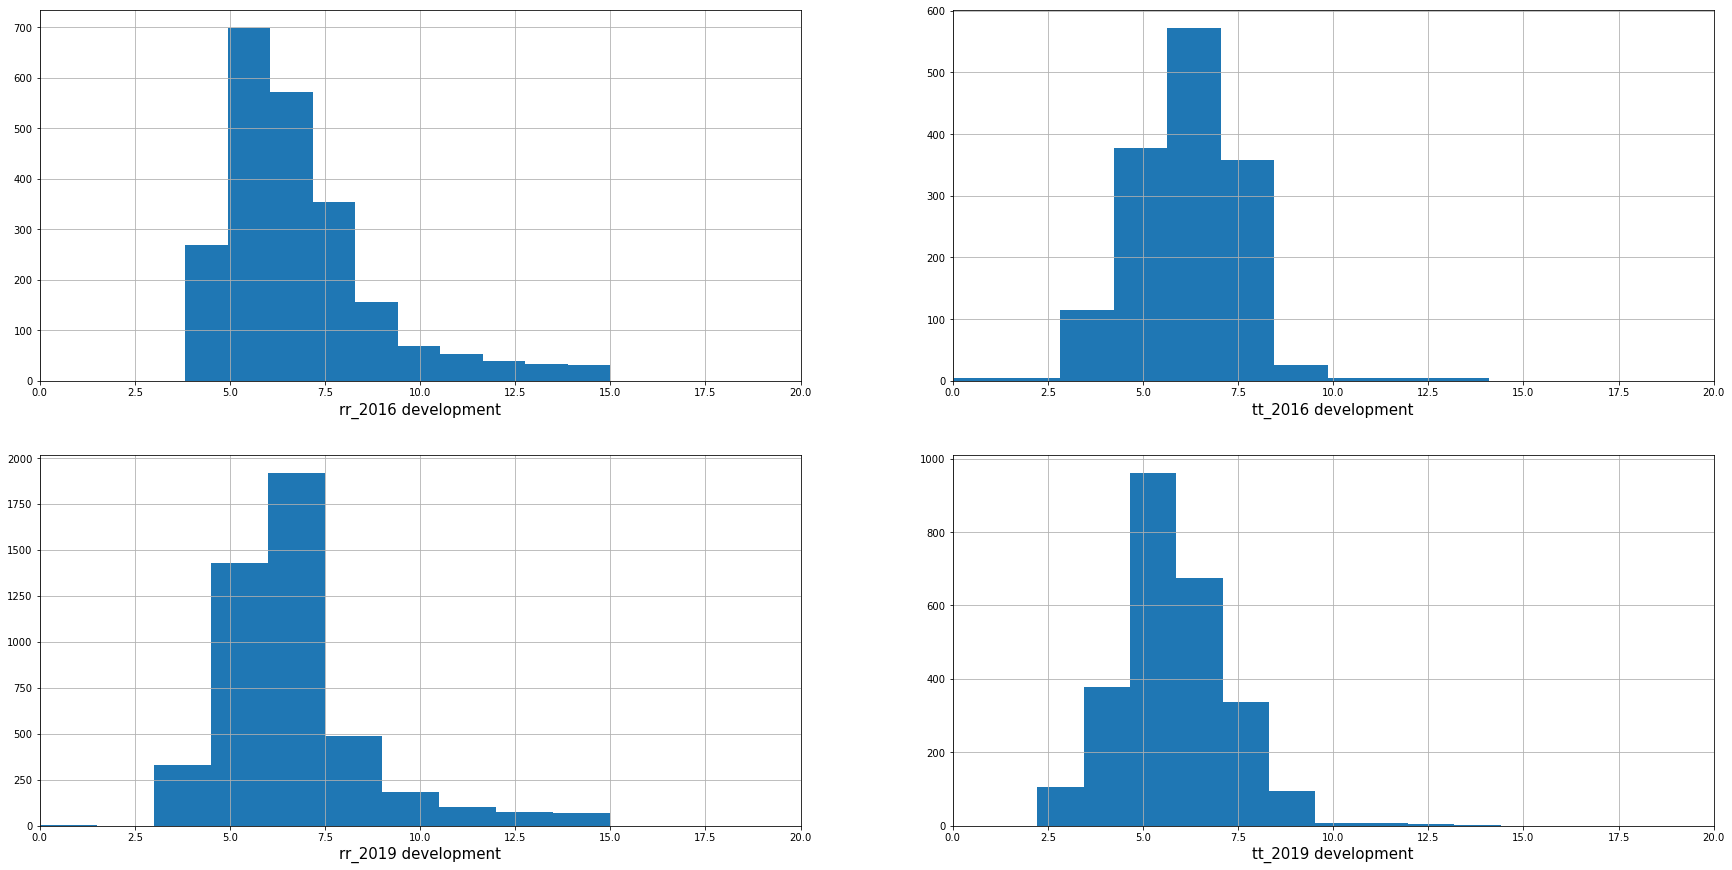

In [22]:
plt.figure(figsize=(30,15))
plt.subplot(2,2,1)
plt.xlabel('rr_2016 development',size=15)
plt.xlim(0,20)
rr_2016.development.hist()

plt.subplot(2,2,2)
plt.xlabel('tt_2016 development',size=15)
plt.xlim(0,20)
tt_2016.development.hist()

plt.subplot(2,2,3)
plt.xlabel('rr_2019 development',size=15)
plt.xlim(0,20)
rr_2019.development.hist()

plt.subplot(2,2,4)
plt.xlabel('tt_2019 development',size=15)
plt.xlim(0,20)
tt_2019.development.hist()

## Gear Usage Conclusion

- the distribution of development mainly between 5.0m to 7.5m.
- the mean of development of race is higher than time trial.
- the standard deviation of developmnt in 2019 is less than 2016, the mean of development in 2019 is lower than it in 2016. maybe because Steve was more experienced in 2019.
